In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('Zomato-data-.csv')

In [4]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
data.shape

(148, 7)

In [8]:
data['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [9]:
data['name'].value_counts()

name
San Churro Cafe          2
Onesta                   2
CAFE NOVA                2
Addhuri Udupi Bhojana    1
Jalsa                    1
                        ..
Melting Melodies         1
New Indraprasta          1
Anna Kuteera             1
Darbar                   1
Vijayalakshmi            1
Name: count, Length: 145, dtype: int64

In [10]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type of Restaurant')

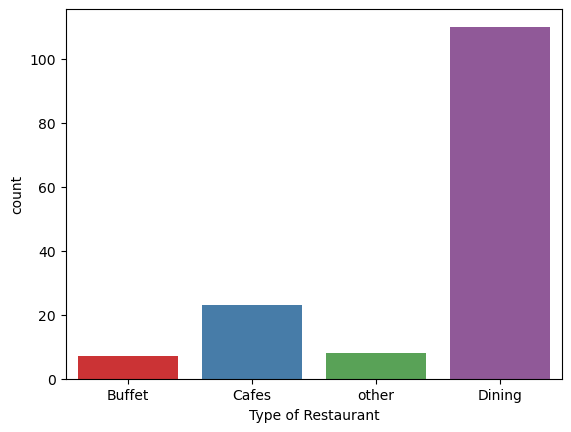

In [11]:
sns.countplot(x=data['listed_in(type)'],palette="Set1")
plt.xlabel('Type of Restaurant')

<Axes: xlabel='listed_in(type)'>

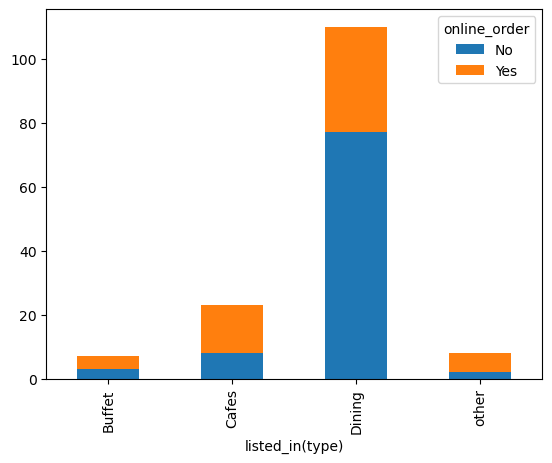

In [50]:
pd.crosstab(data['listed_in(type)'], data['online_order']).plot(kind='bar', stacked=True)

Text(0, 0.5, 'Votes')

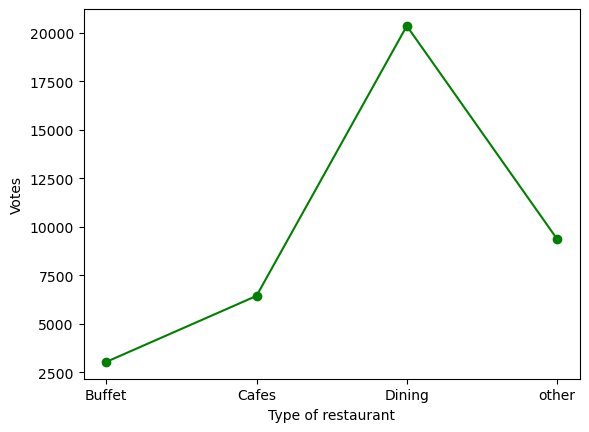

In [32]:
#Total Votes of each Type of Restaurant
grp_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grp_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Text(0, 0.5, 'Avg_Cost')

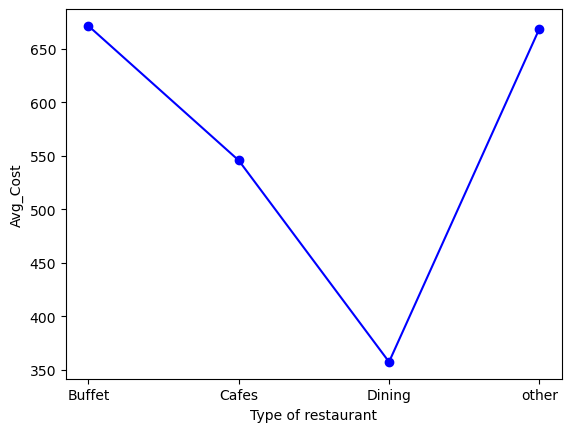

In [31]:
#Avg Cost wise Type of Restaurants
grp_data1 = data.groupby('listed_in(type)')['approx_cost(for two people)'].mean()
result = pd.DataFrame({'approx_cost(for two people)': grp_data1})
plt.plot(result, c='blue', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Avg_Cost')

In [15]:
max_votes = data.loc[data['votes'].idxmax()]
print(f"Restaurant with most votes: {max_votes['name']}")
print(f"Number of votes: {max_votes['votes']}")

Restaurant with most votes: Empire Restaurant
Number of votes: 4884


In [38]:
#Top Rated Restaurants
top_5_rated = data.sort_values(by=['rate'], ascending=False).head(6).drop_duplicates(subset=['name'])[['name', 'rate']]
top_5_rated

,name,rate
44,Onesta,4.6/5
38,Empire Restaurant,4.4/5
86,Meghana Foods,4.4/5
52,Corner House Ice Cream,4.3/5
37,Szechuan Dragon,4.2/5


In [39]:
#Lowest Rated Restaurants
Lowest_5_rated = data.sort_values(by=['rate'], ascending=True).head(5).drop_duplicates(subset=['name'])[['name', 'rate']]
Lowest_5_rated

,name,rate
94,Nandhini Deluxe,2.6/5
31,Foodiction,2.8/5
36,Fast And Fresh,2.8/5
73,LSD Cafe,2.9/5
137,Hotel Andhra Speices,2.9/5


Text(0.5, 1.0, 'Online Order Availability')

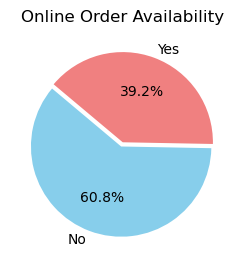

In [47]:
#How many Online Orders are there 
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
online_counts = data['online_order'].value_counts()
plt.pie(online_counts, labels=online_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], startangle=140, explode=(0.05, 0))
plt.title('Online Order Availability')

Text(0.5, 1.0, 'Table Booking Availability')

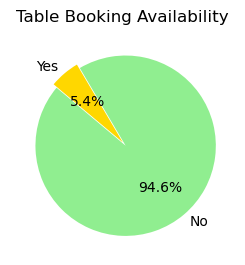

In [49]:
#Table Booking Availaibility
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
book_counts = data['book_table'].value_counts()
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'gold'], startangle=140, explode=(0.05, 0))
plt.title('Table Booking Availability')

In [42]:
#Most Expensive Restaurants
Restaurant_Expense = data.sort_values(by=['approx_cost(for two people)'], ascending=False).head(5).drop_duplicates(subset=['name'])[['name', 'approx_cost(for two people)']]
Restaurant_Expense

,name,approx_cost(for two people)
97,Ayda Persian Kitchen,950
22,Cafe Coffee Day,900
119,K27 - The Pub,900
48,Beijing Bites,850
63,Jeet Restaurant,850


In [61]:
#Most Affordable Restaurants
Res_Expense = data.sort_values(by=['approx_cost(for two people)'], ascending=True).head(5).drop_duplicates(subset=['name'])[['name', 'approx_cost(for two people)']]
Res_Expense

,name,approx_cost(for two people)
122,Coffee Bytes,100
127,Ruchi Maayaka,100
84,Chill Out,100
66,Namma Brahmin's Idli,100
143,Melting Melodies,100


<Axes: xlabel='approx_cost(for two people)', ylabel='rate'>

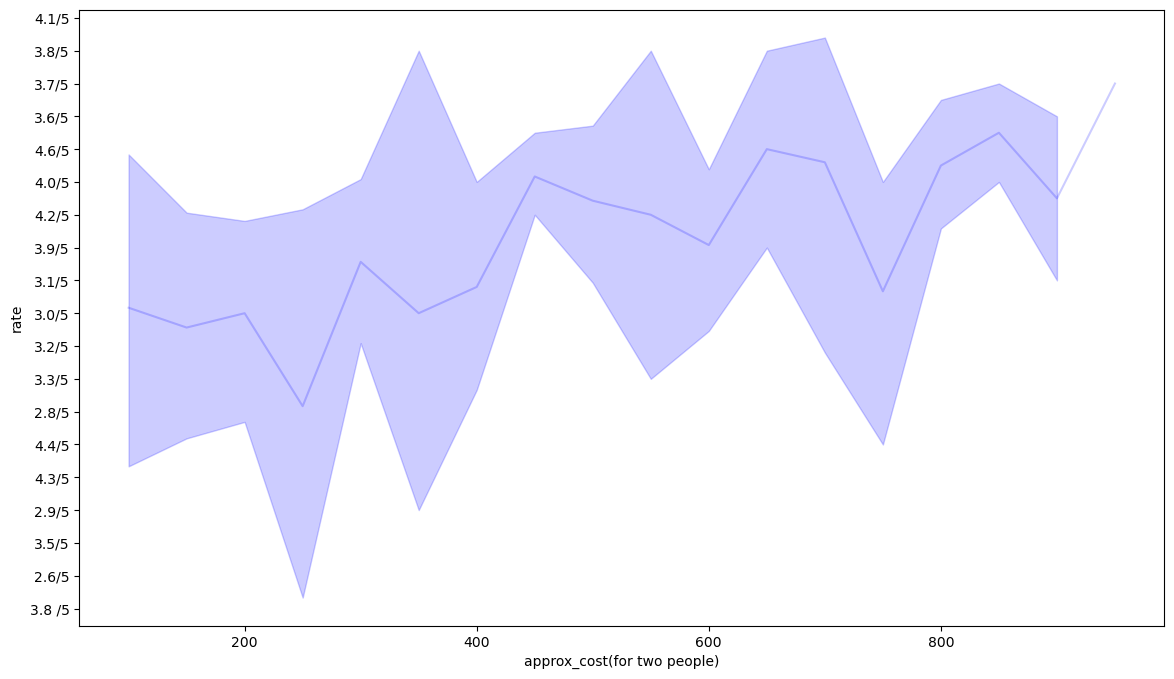

In [53]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='approx_cost(for two people)', y='rate', data=data, alpha=0.2, color='blue')

# Key Observations

**1. Restaurant Types**

* The dataset is dominated by Dining restaurants (110 out of 148)
* Cafes are the second most common (23)
* Dining has also got the Most no of votes
* Avg Cost is more for Buffet Restaurants
* Dining is the Most Budget Friendly

**2. Popularity and Rating Wise**

* Most Popular: Empire Restaurant is the most voted restaurant with 4,884 votes
* Highest Rated: Onesta holds the highest rating at 4.6/5.
* Lowest Rated: Nandhini Deluxe holds the lowest rating at 2.6/5

**3. Cost and Pricing**

* Average Cost: The typical cost for two people is approximately $418.
* Most Expensive: Ayda Persian Kitchen at $950 for two.
* Most Affordable: Namma Brahmin's Idli,Ruchi Maayaka,Coffee Bytes and Others at just $100 for two

**4. Availability**

* 58.1% of restaurants offer online ordering
* Only 5.4% of Restaurants allow Table Booking

**5. There is a weak positive correlation between price and rating. While expensive restaurants are generally rated higher, the "sweet spot" for the best ratings is in the mid-range ($600–$900)**
